### Download NLTK Data

In [1]:
# Import the package and download the necessary data
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# What methods and attributes are available in nltk?
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [65]:
from nltk.corpus import stopwords

In [5]:
# Read in and view the raw data
import pandas as pd

messages = pd.read_csv('./data/spam.csv', encoding='latin-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
# Drop unused columns and label columns that will be used
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
messages.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
messages.shape

(5572, 2)

In [68]:
# What portion of our text messages are actually spam
messages['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [69]:
print('Number of nulls in label: {}'.format(messages['label'].isnull().sum()))
print('Number of nulls in text: {}'.format(messages['text'].isnull().sum()))

Number of nulls in label: 0
Number of nulls in text: 0


In [70]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Remove Punctuation

In [12]:
# Define a function to remove punctuation in our messages
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    return text

messages['text_clean'] = messages['text'].apply(lambda x: remove_punct(x))

messages.head()

,label,text,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


### Tokenize

In [13]:
# Define a function to split our sentences into a list of words
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

messages['text_tokenized'] = messages['text_clean'].apply(lambda x: tokenize(x.lower()))

messages.head()

,label,text,text_clean,text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."


### Remove Stopwords

In [15]:
# Load the list of stopwords built into nltk
import nltk

stopwords = nltk.corpus.stopwords.words('english')

In [16]:
# Define a function to remove all stopwords
def remove_stopwords(tokenized_text):    
    text = [word for word in tokenized_text if word not in stopwords]
    return text

messages['text_nostop'] = messages['text_tokenized'].apply(lambda x: remove_stopwords(x))

messages.head()

,label,text,text_clean,text_tokenized,text_nostop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."


In [18]:
# Define a function to handle all data cleaning
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

### TF-IDF  

In [19]:
# Fit a basic TFIDF Vectorizer and view the results
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(messages['text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5572, 9395)
['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '08700621170150p

C:\Users\msi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
X_tfidf

<5572x9395 sparse matrix of type '<class 'numpy.float64'>'
	with 50453 stored elements in Compressed Sparse Row format>

In [21]:
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Word2vec

In [22]:
import gensim
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 100)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(messages['text_clean'],
                                                    messages['label'], test_size=0.2)

In [23]:
# Train the word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   window=5,
                                   min_count=2)

In [24]:
# Generate a list of words the word2vec model learned word vectors for
words = list(w2v_model.wv.key_to_index.keys())


In [25]:
# Generate aggregated sentence vectors based on the word vectors for each word in the sentence
w2v_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in w2v_model.wv.index_to_key])
                     for ls in X_test])

In [26]:
# Discover if the length of the sentence is different than the length of the sentence vector
for i, v in enumerate(w2v_vect):
    print(len(X_test.iloc[i]), len(v))

67 67
153 153
51 51
100 100
54 54
28 28
135 135
74 74
152 152
56 56
139 139
23 23
43 43
35 35
152 152
25 25
145 145
114 114
114 114
39 39
145 145
136 136
88 88
155 155
141 141
39 39
75 75
33 33
142 142
59 59
50 50
55 55
228 228
135 135
23 23
36 36
59 59
33 33
80 80
221 221
124 124
31 31
45 45
165 165
152 152
41 41
64 64
130 130
32 32
32 32
61 61
68 68
37 37
37 37
21 21
45 45
24 24
25 25
76 76
32 32
30 30
23 23
123 123
45 45
31 31
151 151
160 160
23 23
36 36
29 29
198 198
59 59
35 35
134 134
52 52
156 156
12 12
27 27
127 127
137 137
58 58
5 5
79 79
123 123
50 50
19 19
142 142
83 83
77 77
37 37
30 30
199 199
45 45
33 33
31 31
43 43
86 86
154 154
37 37
36 36
154 154
44 44
58 58
151 151
155 155
145 145
25 25
220 220
44 44
30 30
143 143
25 25
87 87
36 36
160 160
22 22
105 105
31 31
91 91
41 41
80 80
44 44
137 137
27 27
23 23
131 131
78 78
26 26
34 34
49 49
76 76
14 14
40 40
130 130
105 105
41 41
144 144
21 21
28 28
34 34
23 23
141 141
70 70
50 50
130 130
69 69
32 32
31 31
41 41
101 101
29 2

In [27]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
w2v_vect_avg = []

for vect in w2v_vect:
    if len(vect)!=0:
        w2v_vect_avg.append(vect.mean(axis=0))
    else:
        w2v_vect_avg.append(np.zeros(100))

In [28]:
# Are our sentence vector lengths consistent?
for i, v in enumerate(w2v_vect_avg):
    print(len(X_test.iloc[i]), len(v))

67 100
153 100
51 100
100 100
54 100
28 100
135 100
74 100
152 100
56 100
139 100
23 100
43 100
35 100
152 100
25 100
145 100
114 100
114 100
39 100
145 100
136 100
88 100
155 100
141 100
39 100
75 100
33 100
142 100
59 100
50 100
55 100
228 100
135 100
23 100
36 100
59 100
33 100
80 100
221 100
124 100
31 100
45 100
165 100
152 100
41 100
64 100
130 100
32 100
32 100
61 100
68 100
37 100
37 100
21 100
45 100
24 100
25 100
76 100
32 100
30 100
23 100
123 100
45 100
31 100
151 100
160 100
23 100
36 100
29 100
198 100
59 100
35 100
134 100
52 100
156 100
12 100
27 100
127 100
137 100
58 100
5 100
79 100
123 100
50 100
19 100
142 100
83 100
77 100
37 100
30 100
199 100
45 100
33 100
31 100
43 100
86 100
154 100
37 100
36 100
154 100
44 100
58 100
151 100
155 100
145 100
25 100
220 100
44 100
30 100
143 100
25 100
87 100
36 100
160 100
22 100
105 100
31 100
91 100
41 100
80 100
44 100
137 100
27 100
23 100
131 100
78 100
26 100
34 100
49 100
76 100
14 100
40 100
130 100
105 100
41 100
144 

In [29]:
# Create tagged document objects to prepare to train the model
tagged_docs = [gensim.models.doc2vec.TaggedDocument(v, [i]) for i, v in enumerate(X_train)]

### DocToVec

In [30]:
# Train a basic doc2vec model
d2v_model = gensim.models.Doc2Vec(tagged_docs,
                                  vector_size=100,
                                  window=5,
                                  min_count=2)

In [31]:
d2v_model.infer_vector(['i', 'am', 'learning', 'nlp'])

array([ 3.9568832e-03,  9.6676648e-03,  7.7397656e-03,  2.6600449e-03,
       -1.7033711e-03,  1.6782109e-03, -1.7962423e-03, -4.8196840e-04,
        1.5714683e-04,  2.9743908e-03,  3.3160893e-03,  1.5200216e-03,
       -7.4828276e-04, -3.4395205e-03,  2.4442067e-03,  7.3524341e-03,
       -6.1376207e-03,  5.1428284e-03, -2.6711060e-03, -3.0957060e-03,
       -2.5881755e-03,  1.2728132e-03,  2.3494861e-03,  9.6880132e-04,
       -1.0950690e-02,  1.5435368e-03,  1.0357033e-03, -5.6224926e-03,
       -1.4903184e-03,  5.3248932e-03, -7.1081845e-03, -2.4751876e-04,
       -3.5498347e-03,  9.1421120e-03, -3.1721455e-03,  3.2220017e-03,
        5.1712757e-03,  5.3246319e-03, -3.1104239e-03,  2.7306844e-03,
        8.1108194e-03,  5.9503992e-03, -4.4302014e-03,  3.0454595e-03,
        5.5082276e-04,  8.1197527e-04,  3.0777410e-03, -6.6997609e-03,
       -6.0726414e-03, -3.1749539e-03,  2.8276662e-03,  1.9463117e-03,
        2.3885823e-03,  3.4182388e-03, -3.5203109e-03,  3.9676642e-03,
      

In [33]:
# Import the tools we will need from keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [34]:
# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [35]:
# Use that tokenizer to transform the text messages in the training and test sets
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [36]:
X_train_seq[0]

[39, 29, 132, 4, 371, 8, 325, 591]

In [37]:
# Pad the sequences so each sequence is the same length
X_train_seq_padded = pad_sequences(X_train_seq, 50)
X_test_seq_padded = pad_sequences(X_test_seq, 50)

In [38]:
X_train_seq_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  39,  29, 132,   4, 371,   8, 325, 591])

### Build the Model and test it on non-cleaned data 

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', 1000)

messages = pd.read_csv('./data/spam.csv', encoding='latin-1')
messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["label", "text"]
labels = np.where(messages['label']=='spam', 1, 0)

X_train, X_test, y_train, y_test = train_test_split(messages['text'],
                                                    labels, test_size=0.2)

In [40]:
# Import the tools needed from keras and define functions to calculate recall and precision
import keras.backend as K
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

In [41]:
# Construct a simple RNN model
model = Sequential()

model.add(Embedding(len(tokenizer.index_word)+1, 32))
model.add(LSTM(32, dropout=0, recurrent_dropout=0))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          271168    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 280,577
Trainable params: 280,577
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision_m, recall_m])

In [43]:
# Fit the RNN model
history = model.fit(X_train_seq_padded, y_train, 
                    batch_size=32, epochs=10,
                    validation_data=(X_test_seq_padded, y_test))

Epoch 1/10
140/140 [==============================] - 4s 15ms/step - loss: 0.4345 - accuracy: 0.8613 - precision_m: 0.0047 - recall_m: 0.0103 - val_loss: 0.3862 - val_accuracy: 0.8700 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/10
140/140 [==============================] - 2s 12ms/step - loss: 0.3850 - accuracy: 0.8649 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_loss: 0.4079 - val_accuracy: 0.8700 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/10
140/140 [==============================] - 2s 12ms/step - loss: 0.3099 - accuracy: 0.8690 - precision_m: 0.2083 - recall_m: 0.0673 - val_loss: 0.5201 - val_accuracy: 0.8628 - val_precision_m: 0.0571 - val_recall_m: 0.0200
Epoch 4/10
140/140 [==============================] - 2s 12ms/step - loss: 0.2160 - accuracy: 0.9082 - precision_m: 0.7174 - recall_m: 0.4862 - val_loss: 0.6461 - val_accuracy: 0.7865 - val_precision_m: 0.1158 - val_recall_m: 0.1107
Epoch 5/10
140/140 [========================

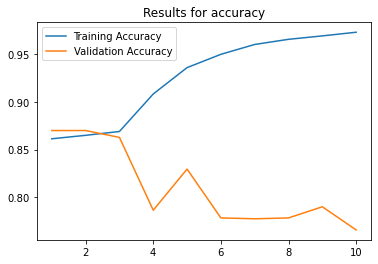

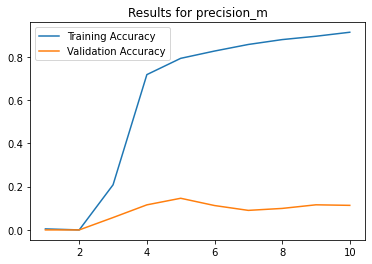

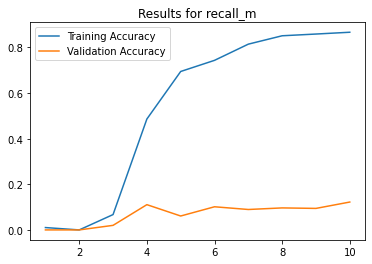

In [45]:
# Plot the evaluation metrics by each epoch for the model to see if we are over or underfitting
import matplotlib.pyplot as plt

for i in ['accuracy', 'precision_m', 'recall_m']:
    acc = history.history[i]
    val_acc = history.history['val_{}'.format(i)]
    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Results for {}'.format(i))
    plt.legend()
    plt.show()

### Testing in cleaned  

In [46]:
# Load the cleaned training and test sets
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

X_train = pd.read_csv('./data/X_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
y_train = pd.read_csv('./data/y_train.csv')
y_test = pd.read_csv('./data/y_test.csv')

X_train.head()

,clean_text
0,"['living', 'simple', 'loving', 'also', 'simple', 'laughing', 'simple', 'winning', 'tooo', 'simple', 'simple', 'difficult', '']"
1,"['already', 'squatting', 'new', 'way', 'walking']"
2,"['sister', 'got', 'placed', 'birla', 'soft', 'da']"
3,"['lovely', 'smell', 'bus', 'aint', 'tobacco', '']"
4,"['yes', 'nigh', 'cant', 'aha']"


### Create TF-IDF Vectors

In [47]:
# Instantiate and fit a TFIDF vectorizer and then use that trained vectorizer
# to transform the messages in the training and test sets
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train['clean_text'])
X_train_vect = tfidf_vect.transform(X_train['clean_text'])
X_test_vect = tfidf_vect.transform(X_test['clean_text'])

In [48]:
# What words did the vectorizer learn?
tfidf_vect.vocabulary_

{'living': 4429,
 'simple': 6569,
 'loving': 4511,
 'also': 1022,
 'laughing': 4305,
 'winning': 7967,
 'tooo': 7404,
 'difficult': 2471,
 'already': 1016,
 'squatting': 6832,
 'new': 5049,
 'way': 7848,
 'walking': 7802,
 'sister': 6588,
 'got': 3379,
 'placed': 5576,
 'birla': 1457,
 'soft': 6685,
 'da': 2274,
 'lovely': 4503,
 'smell': 6650,
 'bus': 1677,
 'aint': 971,
 'tobacco': 7358,
 'yes': 8174,
 'nigh': 5069,
 'cant': 1763,
 'aha': 956,
 'yup': 8235,
 'remb': 6058,
 'think': 7271,
 'book': 1527,
 'sorry': 6733,
 'roommates': 6206,
 'took': 7401,
 'forever': 3107,
 'ok': 5246,
 'come': 2039,
 'b4u': 1279,
 'voucher': 7760,
 'wc': 7850,
 '2703': 427,
 'marsms': 4643,
 'log': 4447,
 'onto': 5286,
 'wwwb4utelecom': 8085,
 'discount': 2508,
 'credit': 2208,
 'opt': 5312,
 'reply': 6090,
 'stop': 6916,
 'customer': 2261,
 'care': 1775,
 'call': 1717,
 '08717168528': 125,
 'kindly': 4190,
 'send': 6403,
 'one': 5273,
 'flat': 3057,
 'ltdecimalgt': 4525,
 'today': 7362,
 'ceri': 1839,

In [49]:
# How are these vectors stored?
X_test_vect[0]

<1x8264 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [50]:
# Can we convert the vectors to arrays?
X_test_vect[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# Fit a basic Random Forest model on these vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect, y_train.values.ravel())

In [52]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect)

In [53]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 1.0 / Recall: 0.776 / Accuracy: 0.97


### Create word2vec Vectors

In [55]:
# Train a basic word2vec model
w2v_model = gensim.models.Word2Vec(X_train,
                                   window=5,
                                   min_count=2)

In [58]:
# Replace the words in each text message with the learned word vector
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_train['clean_text']])
X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in X_test['clean_text']])

In [59]:
# Average the word vectors for each sentence (and assign a vector of zeros if the model
# did not learn any of the words in the text message during training
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [60]:
# What does the unaveraged version look like?
X_train_vect[0]

array([[-8.6196875e-03,  3.6657380e-03,  5.1898835e-03,  5.7419371e-03,
         7.4669169e-03, -6.1676763e-03,  1.1056137e-03,  6.0472824e-03,
        -2.8400517e-03, -6.1735227e-03, -4.1022300e-04, -8.3689503e-03,
        -5.6000138e-03,  7.1045374e-03,  3.3525396e-03,  7.2256685e-03,
         6.8002464e-03,  7.5307419e-03, -3.7891555e-03, -5.6180713e-04,
         2.3483753e-03, -4.5190332e-03,  8.3887316e-03, -9.8581649e-03,
         6.7646410e-03,  2.9144168e-03, -4.9328329e-03,  4.3981862e-03,
        -1.7395759e-03,  6.7113829e-03,  9.9648498e-03, -4.3624449e-03,
        -5.9933902e-04, -5.6956387e-03,  3.8508223e-03,  2.7866268e-03,
         6.8910765e-03,  6.1010956e-03,  9.5384959e-03,  9.2734173e-03,
         7.8980681e-03, -6.9895051e-03, -9.1558648e-03, -3.5575390e-04,
        -3.0998420e-03,  7.8943158e-03,  5.9385728e-03, -1.5456629e-03,
         1.5109634e-03,  1.7900396e-03,  7.8175711e-03, -9.5101884e-03,
        -2.0553112e-04,  3.4691954e-03, -9.3897345e-04,  8.38177

In [61]:
# What does the averaged version look like?
X_train_vect_avg[0]

array([-0.00631013,  0.00268594,  0.00516516,  0.00667546,  0.00267553,
       -0.00643886,  0.00263512,  0.0068832 , -0.00346159, -0.00548491,
        0.0018157 , -0.00641596, -0.00529619,  0.00694726,  0.00100605,
        0.00464233,  0.0056792 ,  0.00566249, -0.00507374, -0.00310095,
        0.00376649, -0.00177923,  0.00792272, -0.00682358,  0.00664643,
        0.00110876, -0.00379385,  0.00478973, -0.00339159,  0.00366924,
        0.00497158, -0.00338176,  0.00229708, -0.0061595 ,  0.0020838 ,
        0.00143681,  0.00723004,  0.00266338,  0.00682611,  0.00526566,
        0.00289761, -0.00356185, -0.00904264, -0.00150892, -0.0022242 ,
        0.00555417,  0.00205291,  0.00164302,  0.0025027 ,  0.00391664,
        0.00325315, -0.00550848, -0.00132883,  0.00271358,  0.00175748,
        0.00471207,  0.00772699,  0.0027298 , -0.00152216,  0.00819272,
       -0.00654671,  0.00238261, -0.00449589, -0.00583002,  0.00213315,
        0.00454161,  0.00529593, -0.00253789,  0.00452584,  0.00

### Random Forest Classifier

In [62]:
# Instantiate and fit a basic Random Forest model on top of the vectors
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [63]:
# Use the trained model to make predictions on the test data
y_pred = rf_model.predict(X_test_vect_avg)

In [64]:
# Evaluate the predictions of the model on the holdout test set
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test['label']).sum()/len(y_pred), 3)))

Precision: 0.574 / Recall: 0.211 / Accuracy: 0.875
